In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

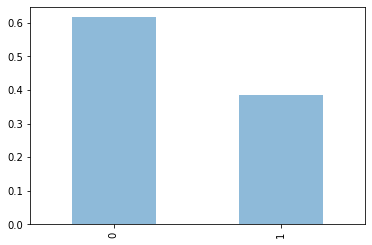

In [55]:
train.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)

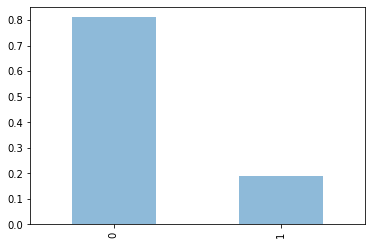

In [56]:
train.Survived[train.Sex=='male'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

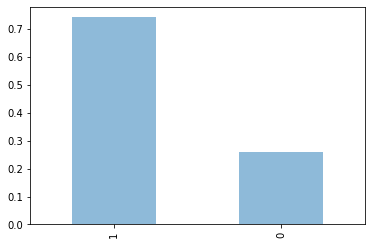

In [57]:
train.Survived[train.Sex=='female'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

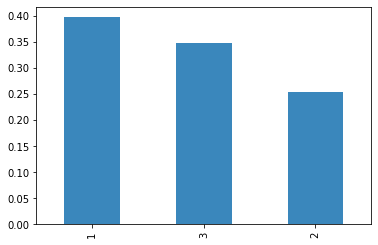

In [58]:
for i in [1,2,3]:
    train.Pclass[(train.Survived==1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

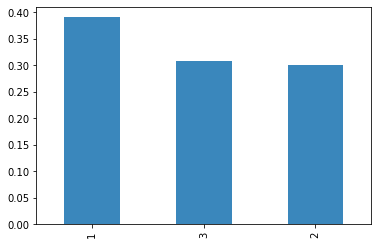

In [59]:
for i in [1,2,3]:
    train.Pclass[(train.Survived==1) & (train.Sex=='female')].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

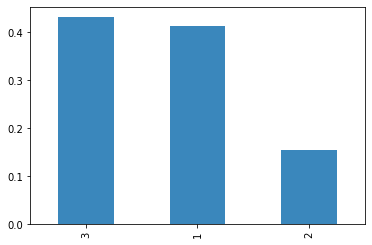

In [60]:
for i in [1,2,3]:
    train.Pclass[(train.Survived==1) & (train.Sex=='male')].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

In [61]:
train.Pclass.mode()

0    3
dtype: int64

In [62]:
train['hypo'] = 0
train.loc[train.Sex=='female','hypo'] = 1

train['Result'] = 0
train.loc[train.Survived == train.hypo,'Result'] = 1

print(train.Result.value_counts(normalize=True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hypo,Result
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [64]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
hypo             0
Result           0
dtype: int64

In [65]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
train.loc[train.Sex=='male','Sex'] = 0
train.loc[train.Sex=='female','Sex'] = 1

In [67]:
train.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test.Sex =le.fit_transform(test.Sex)

In [69]:
test.Sex

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [70]:
train['Age']= train['Age'].fillna(train['Age'].dropna().median())

In [71]:
train["Embarked"] = train["Embarked"].fillna("S")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Embarked =le.fit_transform(train.Embarked)

In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
hypo             0
Result           0
dtype: int64

In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [74]:
test['Age']= test['Age'].fillna(test['Age'].dropna().median())

In [75]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
test['Fare']= test['Fare'].fillna(test['Fare'].dropna().median())

In [77]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [78]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test.Embarked =le.fit_transform(test.Embarked)

In [80]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [81]:
target_train = train['Survived'].values
features_train = train[['Pclass','Age','Embarked','Fare','Sex','SibSp','Parch']].values

In [82]:
features_test = test[['Pclass','Age','Embarked','Fare','Sex','SibSp','Parch']].values

In [83]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(random_state = 1,max_depth = 7, min_samples_split = 2)
dc.fit(features_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [84]:
print(dc.score(features_train,target_train))

0.8787878787878788


In [85]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dc,features_train,target_train,scoring='accuracy',cv=50)
print (score)
print (score.mean())

[0.77777778 0.66666667 0.83333333 0.94444444 0.83333333 0.88888889
 0.66666667 0.83333333 0.94444444 0.88888889 0.72222222 0.72222222
 0.83333333 0.77777778 0.72222222 0.83333333 0.94444444 0.72222222
 0.94444444 0.88888889 0.88888889 0.83333333 0.83333333 0.88888889
 0.88888889 0.83333333 0.83333333 0.88888889 0.77777778 0.88888889
 0.72222222 0.66666667 0.88888889 0.88888889 0.83333333 0.77777778
 0.72222222 0.66666667 0.88888889 0.77777778 0.83333333 0.88888889
 0.88235294 0.94117647 0.82352941 0.64705882 0.88235294 0.82352941
 1.         0.9375    ]
0.82875


In [86]:
target_test = dc.predict(features_test)

In [87]:
print(target_test)

[0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 0 1]


In [88]:
Sub = pd.DataFrame()
Sub['PassengerId'] = test['PassengerId']
Sub['Survived'] = target_test
Sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [89]:
if len(Sub) == len(test):
    print('Yess')
else:
    print('NO')

Yess


In [91]:
Sub.to_csv("Titanic(Complete).csv",index=False)
print('Its ready')

Its ready


In [92]:
Submission_check = pd.read_csv("Titanic_Submission.csv")
Submission_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
